x1 | x2 | y

> When we have two or more input features and one output variable, Multiple Linear Regression fits a **hyperplane** instead of a simple regression line.


### Multiple Linear Regression Equation

For two input features:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2
$$

Where:
- beta_0 is the intercept (bias)
- beta_1, beta_2 are the coefficients
- x_1, x_2 are input features

---

### Generalized form (multiple dimensions)

For p input features:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p
$$

---

### Matrix form

$$
\hat{y} = X\beta
$$

Where:
- X is the feature matrix  
- beta is the coefficient vector
- beta is the coefficient vector
eta \) is the coefficient vector


$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n
$$



$$
y = \beta_0 + \sum_{i=1}^{n} \beta_i x_i
$$


---
here : 
$$
\text{lpa} = \beta_0 + \beta_1 \cdot \text{cgpa} + \beta_2 \cdot \text{iq}
$$


In [2]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [3]:
X,y = make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1, noise=50)

In [4]:
df = pd.DataFrame({'feature1':X[:,0],'feature2':X[:,1],'target':y})

In [5]:
df.shape

(100, 3)

In [6]:
df.head()

,feature1,feature2,target
0,0.775520,0.692835,-22.925122
1,-0.051563,-0.916219,8.572878
2,0.392155,0.056401,-19.802967
3,0.499478,-0.795322,20.827293
4,1.097709,-0.014637,13.268837


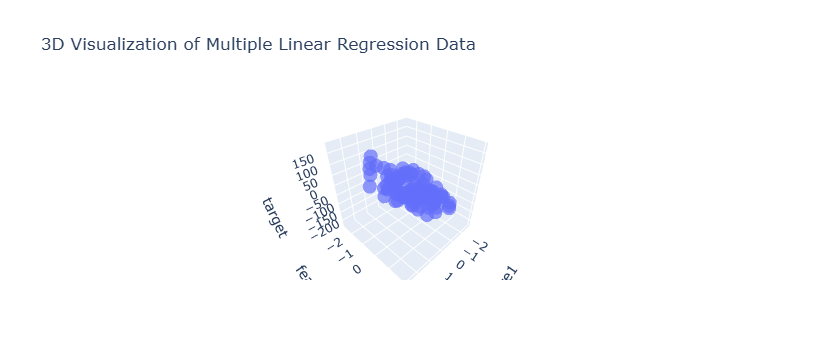

In [7]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x='feature1',
    y='feature2',
    z='target',
    opacity=0.7,
    title='3D Visualization of Multiple Linear Regression Data'
)

fig.show()

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(X_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
y_pred = lr.predict(X_test)

In [13]:

print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 42.66754340220689
MSE 2565.8733843538885
R2 score 0.6484008498927156


In [14]:
# 3D plot with hyperplane

In [15]:
import numpy as np

x_range = np.linspace(df['feature1'].min(), df['feature1'].max(), 20)
y_range = np.linspace(df['feature2'].min(), df['feature2'].max(), 20)

xGrid, yGrid = np.meshgrid(x_range, y_range)

In [16]:
grid_points = np.c_[xGrid.ravel(), yGrid.ravel()]

In [17]:
grid_points.shape

(400, 2)

In [18]:
z_pred = lr.predict(grid_points)
zGrid = z_pred.reshape(xGrid.shape)

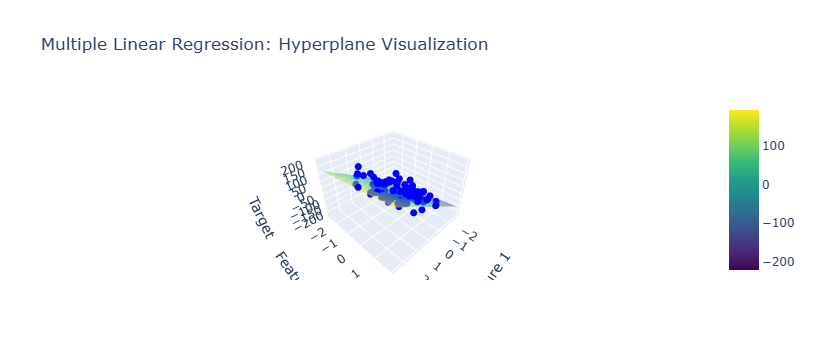

In [20]:
import plotly.graph_objects as go

fig = go.Figure()

# Scatter: actual data points
fig.add_trace(go.Scatter3d(
    x=df['feature1'],
    y=df['feature2'],
    z=df['target'],
    mode='markers',
    marker=dict(size=4, color='blue'),
    name='Data Points'
))

# Surface: regression plane
fig.add_trace(go.Surface(
    x=xGrid,
    y=yGrid,
    z=zGrid,
    opacity=0.5,
    colorscale='Viridis',
    name='Regression Plane'
))

fig.update_layout(
    title='Multiple Linear Regression: Hyperplane Visualization',
    scene=dict(
        xaxis_title='Feature 1',
        yaxis_title='Feature 2',
        zaxis_title='Target',
        aspectratio=dict(x=1, y=1, z=0.7)
    )
)

fig.show()